In [1]:
import json
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
with open('label_data.json') as json_file:
    data = json.load(json_file)

In [3]:
maps = os.listdir('/home/emil/Documents/github/BSc-PRO/dataset3/res_still')
for m in maps:
    classes = os.listdir('/home/emil/Documents/github/BSc-PRO/dataset3/res_still/'+m)
    for k in range(len(classes)):
        names = os.listdir('/home/emil/Documents/github/BSc-PRO/dataset3/res_still/train/'+classes[k])
        count = 0
        for i in range(len(names)):
            for j in range(len(data)):
                if (names[i] == data[j]['External ID']):
                    count = count + 1
                        
        print('('+m+')'+classes[k]+': '+'found '+str(count)+' of '+str(len(names)))           


(train)carrots: found 233 of 233
(train)ketchup: found 264 of 264
(train)arm: found 237 of 237
(train)bun: found 267 of 267
(train)catfood_beef: found 234 of 234
(train)potato: found 237 of 237
(train)background: found 161 of 161
(train)catfood_salmon: found 242 of 242
(test)carrots: found 233 of 233
(test)ketchup: found 264 of 264
(test)arm: found 237 of 237
(test)bun: found 267 of 267
(test)catfood_beef: found 234 of 234
(test)potato: found 237 of 237
(test)background: found 161 of 161
(test)catfood_salmon: found 242 of 242


Combining all labels with the image paths
-----

Combined = (url_to_image, label)

In [4]:
orig_str = '/home/emil/Documents/github/BSc-PRO/dataset3/res_still'
combined = []
maps = os.listdir(orig_str)
for m in maps:
    map_str =orig_str+'/'+m
    classes = os.listdir(map_str)
    for k in range(len(classes)):
        path_str = map_str+'/'+classes[k]
        names = os.listdir(path_str)
        count = 0
        for i in range(len(names)):
            for j in range(len(data)):
                if names[i] == data[j]['External ID']:
                    combined.append((m ,path_str+'/'+names[i], data[j] ))
                    
print('Loaded '+str(len(combined))+' out of '+str(2347)+'.')

Loaded 2347 out of 2347.


Checking if bounding boxes are set correctly
-----

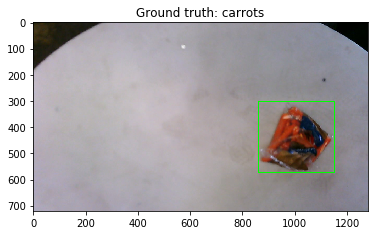

In [5]:
current = combined[39]

img = cv2.imread(current[1])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

for c in classes:
    label = current[2]['Label']
    if c in label:
        ground_truth = c
        (xUL, yUL) = ( label[c][0]['geometry'][0]['x'],label[c][0]['geometry'][0]['y'] )
        (xBR, yBR) = ( label[c][0]['geometry'][2]['x'],label[c][0]['geometry'][2]['y'] )


cv2.rectangle(img,(xUL, yUL),(xBR, yBR),(0,255,0),3)

plt.title('Ground truth: '+ground_truth)
plt.imshow(img)

Exporting images and labels
----

First the data is split into **train** and **test** in the same way as the original dataset.

In [6]:
train = []
test = []
for comb in combined:
    if (comb[0] == 'train'):
        train.append( (comb[1] , comb[2]) )
    if (comb[0] == 'test'):
        test.append( (comb[1] , comb[2]) )
        
print('(train) Found '+str(len(train))+' out of 1875')
print('(test) Found '+str(len(test))+' out of 472')

(train) Found 1875 out of 1875
(test) Found 472 out of 472


Then the train and test data is written to a txt file

In [7]:
file = open("train.txt","w")

for t in train:
    file_path = t[0]
    label = t[1]['Label']
    for c in classes:
        if c in label:
            ground_truth = c
            (xUL, yUL) = ( label[c][0]['geometry'][1]['x'],label[c][0]['geometry'][1]['y'] )
            (xBR, yBR) = ( label[c][0]['geometry'][3]['x'],label[c][0]['geometry'][3]['y'] )
        
    file.write(file_path+','+str(xUL)+','+str(yUL)+','+str(xBR)+','+str(yBR)+','+ground_truth+'\n')

file.close()


file = open("test.txt","w")

for t in test:
    file_path = t[0]
    label = t[1]['Label']
    for c in classes:
        if c in label:
            ground_truth = c
            (xUL, yUL) = ( label[c][0]['geometry'][1]['x'],label[c][0]['geometry'][1]['y'] )
            (xBR, yBR) = ( label[c][0]['geometry'][3]['x'],label[c][0]['geometry'][3]['y'] )
        
    file.write(file_path+','+str(xUL)+','+str(yUL)+','+str(xBR)+','+str(yBR)+','+ground_truth+'\n')

file.close()

In [8]:
cv2.imread(combined[0][1]).shape[:2]

(720, 1280)

In [9]:
type(combined[0][1])

str